<a href="https://colab.research.google.com/github/SeungHan0816/Colab_Practice/blob/main/Colab_Practice05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05-03 소프트맥스 회귀 다양한 방법으로 구현하기

In [1]:
# 1) 파이토치로 소프트맥스의 비용 함수 구현하기 (로우-레벨)

import torch
import torch.nn.functional as F
torch.manual_seed(1)

z = torch.FloatTensor([1, 2, 3])

hypothesis = F.softmax(z, dim=0)
print(hypothesis)
print(hypothesis.sum())

z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

y = torch.randint(5, (3,)).long()
print(y)

y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
# scatter_(dim, index, src)
# y.unsqueeze(1) → 열 추가 (N, 1)
# → tensor([[0],
#           [2],
#           [1]])  # shape: (3,1)

print(y.unsqueeze(1))
print(y_one_hot)

print("-"*50)

cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean() # 비용 함수
print(cost)

print("-"*50)

# 2) 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

print(torch.log(F.softmax(z, dim=1))) # Low level

print("-"*50)

print(F.log_softmax(z, dim=1)) # High level

print("-"*50)

print((y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()) # 비용 함수
# torch.log(F.softmax(z, dim=1))를 F.log_softmax()로 대체

print("-"*50)

# High level
# F.nll_loss()를 사용할 때는 원-핫 벡터를 넣을 필요없이 바로 실제값을 인자로 사용
# nll은 Negative Log Likelihood(부정적 로그 가능도)의 약자
# F.nll_loss(로그확률, 정답) → 정답 = y
print(F.nll_loss(F.log_softmax(z, dim=1), y)) # 비용 함수

print("-"*50)

# F.cross_entropy()는 F.log_softmax()와 F.nll_loss()를 포함
# F.cross_entropy는 비용 함수에 소프트맥스 함수까지 포함하고 있음!
# F.cross_entropy(z, y) → z: 모델의 출력 (logits), y: 레이블 (정답 클래스)
print(F.cross_entropy(z, y)) # 비용 함수

print("-"*50)

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)
tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2, 1])
tensor([[0],
        [2],
        [1]])
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])
--------------------------------------------------
tensor(1.4689, grad_fn=<MeanBackward0>)
--------------------------------------------------
tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)
--------------------------------------------------
tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)
-----------------------------------------

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

# 2) 소프트맥스 회귀 구현하기(로우-레벨)

print(x_train.shape)
print(y_train.shape)

y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
# 1번째 축(열 방향)에, 각 샘플의 정답 인덱스 위치에, 1을 채운다
print(y_one_hot.shape)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  hypothesis = F.softmax(x_train.matmul(W) + b, dim = 1)
  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()))


torch.Size([8, 4])
torch.Size([8])
torch.Size([8, 3])
Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.622999
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467661
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285072
Epoch 1000/1000 Cost: 0.248155


In [3]:
# 3) 소프트맥스 회귀 구현하기(하이-레벨

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  z = x_train.matmul(W) + b
  cost = F.cross_entropy(z, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


In [4]:
# 4) 소프트맥스 회귀 nn.Module로 구현하기

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

model = nn.Linear(4, 3)

optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


In [5]:
# 5) 소프트맥스 회귀 클래스로 구현하기

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

class softmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3) # 모델이 3개의 클래스를 예측

  def forward(self, x):
    return self.linear(x)

model = softmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


# 05-04 소프트맥스 회귀로 MNIST 데이터 분류하기

다음 기기로 학습합니다: cuda
Epoch: 0001 cost = 0.629259884
Epoch: 0002 cost = 0.239338055
Epoch: 0003 cost = 0.174289420
Epoch: 0004 cost = 0.134270042
Epoch: 0005 cost = 0.108730435
Epoch: 0006 cost = 0.091768280
Epoch: 0007 cost = 0.078132525
Epoch: 0008 cost = 0.068358786
Epoch: 0009 cost = 0.059538562
Epoch: 0010 cost = 0.052699018
Epoch: 0011 cost = 0.046947338
Epoch: 0012 cost = 0.041584644
Epoch: 0013 cost = 0.037191320
Epoch: 0014 cost = 0.032507204
Epoch: 0015 cost = 0.028893672
Epoch: 0016 cost = 0.026011983
Epoch: 0017 cost = 0.022315463
Epoch: 0018 cost = 0.020868883
Epoch: 0019 cost = 0.017537978
Epoch: 0020 cost = 0.015691059
Epoch: 0021 cost = 0.014292915
Epoch: 0022 cost = 0.012250604
Epoch: 0023 cost = 0.010623966
Epoch: 0024 cost = 0.009463811
Epoch: 0025 cost = 0.008534168
Epoch: 0026 cost = 0.006940339
Epoch: 0027 cost = 0.006648692
Epoch: 0028 cost = 0.005676397
Epoch: 0029 cost = 0.004915499
Epoch: 0030 cost = 0.004441361
Learning finished
Accuracy: 0.9746999740600586
Labe

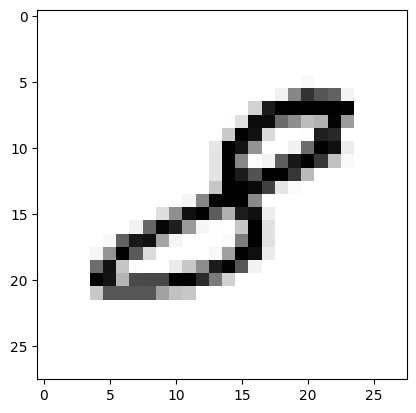

--------------------------------------------------
Index 0 → Label: 7, Prediction: 7
Index 1 → Label: 2, Prediction: 2
Index 2 → Label: 1, Prediction: 1
Index 3 → Label: 0, Prediction: 0
Index 4 → Label: 4, Prediction: 4
Index 5 → Label: 1, Prediction: 1
Index 6 → Label: 4, Prediction: 4
Index 7 → Label: 9, Prediction: 9
Index 8 → Label: 5, Prediction: 6
Index 9 → Label: 9, Prediction: 9
--------------------------------------------------
❌ 틀림! Index: 8, Label: 5, Prediction: 6


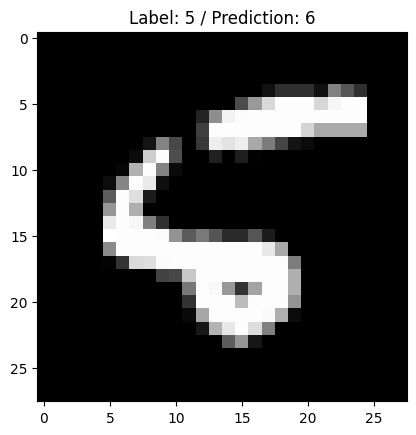

In [5]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

traing_epochs = 30
batch_size = 100

# MNIST dataset
# root는 MNIST 데이터를 다운로드 받을 경로
# train에 True를 주면 MNIST의 훈련 데이터를 리턴, False를 주면 테스트 데이터를 리턴
# transform은 현재 데이터를 파이토치 텐서로 변환
# download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
# dataset은 로드할 대상을 의미
# batch_size는 배치 크기
# shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부
# drop_last는 마지막 배치를 버릴 것인지 의미
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

# MNIST data image of shape 28 * 28 = 784, 출력 갯수 0 ~ 9까지 총 10개
# bias는 편향 b를 사용할 것인지를 나타내며
# 기본값은 True이므로 굳이 할 필요는 없지만 명시적으로 True를 함.

# to() 함수는 연산을 어디서 수행할지를 정함.
# GPU를 사용하려면 to('cuda')를 해 줄 필요가 있음.
# 아무것도 지정하지 않은 경우에는 CPU 연산
# 먼저 device를 변수로 지정했음.

# linear = nn.Linear(784, 10, bias=True).to(device) 사용 결과
# 라벨과 예측이 틀리기에 비선형 활성함수(ReLU) 사용
# 비선형 계층이 추가되어 성능 향상 및 정확도 증가
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)).to(device)

# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# avg_cost는 에포크 동안의 평균 비용을 저장하는 변수
# total_batch는 에포크당 수행할 배치(batch) 수를 계산
# data_loader는 미니 배치 학습을 위해 데이터를 반복적으로 제공하는 역할
for epoch in range (traing_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    # 손실 함수(criterion), 비용(cost)
    # 비용이 작을수록 모델의 예측이 실제 값에 가까워짐.
    cost = criterion(hypothesis, Y)
    cost.backward()
    # 옵티마이저의 step()을 호출, 모델의 파라미터(가중치와 편향)를 업데이트
    optimizer.step()

    # avg_cost = avg_cost + (cost / total_batch)
    # avg_cost = 0 (처음이 0)
    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')



# 테스트 데이터를 사용하여 모델을 테스트한다.
# 학습이 아니라 예측만 하고 싶을 때 사용
with torch.no_grad():
  X_test = mnist_test.data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.targets.to(device)

  prediction = model(X_test)
  # 1은 dim=1(가로 방향)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
  # 묶음(batch) 형태로 가져오기 위해 [r:r+1] 사용
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.targets[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = model(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item()) # 1은 dim=1(가로 방향)

  #plt.imshow(...): 이미지를 보여줌
  plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  #plt.show(): 이미지 시각화 실행
  plt.show()

# UserWarning: test_data has been renamed data
# UserWarning: test_labels has been renamed targets
# mnist_test.test_data와 mnist_test.test_labels 대신
# 앞으로는 mnist_test.data 그리고 mnist_test.targets를 써야 된다는
# PyTorch 최신 버전의 경고임.

print('-'*50)

for i in range(10):
  r = i
  X_single_data = mnist_test.data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.targets[r:r+1].to(device)
  prediction = model(X_single_data)
  pred = torch.argmax(prediction, 1).item()
  label = Y_single_data.item()
  print(f"Index {r} → Label: {label}, Prediction: {pred}")

print('-'*50)

with torch.no_grad():
  for i in range(100):
    X_single = mnist_test.data[i:i+1].view(-1, 28*28).float().to(device)
    Y_single = mnist_test.targets[i:i+1].to(device)
    pred = torch.argmax(model(X_single), 1)
    if pred.item() != Y_single.item():
        print(f"❌ 틀림! Index: {i}, Label: {Y_single.item()}, Prediction: {pred.item()}")
        plt.imshow(mnist_test.data[i].view(28,28), cmap='gray')
        plt.title(f"Label: {Y_single.item()} / Prediction: {pred.item()}")
        plt.show()
